## SELECTION DES ATTRIBUTS

#### EXO1

#### EXO2

In [2072]:
import pandas as pd

In [2073]:
import numpy as np

url = "./airquality.csv"
data = pd.read_csv(url, sep=',')

data = data[~np.isnan(data).any(axis=1)]

print(data.columns)

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


In [2074]:
data.shape

(111, 7)

In [2075]:
data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [2076]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7


In [2077]:
data = data.drop(data.columns[0], axis=1) 

In [2078]:
from sklearn.preprocessing import MinMaxScaler


numeric_columns = data.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

Correlation matrix

In [2079]:
df = pd.DataFrame(data)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.612497  0.698541  0.142885 -0.005190
Solar.R  0.348342  1.000000 -0.127183  0.294088 -0.074067 -0.057754
Wind    -0.612497 -0.127183  1.000000 -0.497190 -0.194496  0.049871
Temp     0.698541  0.294088 -0.497190  1.000000  0.403972 -0.096546
Month    0.142885 -0.074067 -0.194496  0.403972  1.000000 -0.009001
Day     -0.005190 -0.057754  0.049871 -0.096546 -0.009001  1.000000


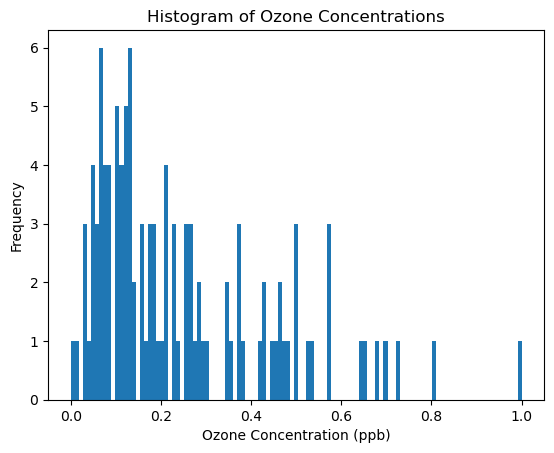

In [2080]:
import matplotlib.pyplot as plt


plt.hist(data["Ozone"], bins=data.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()

### preparation des training_data et test_data 

# Linear regression

In [2081]:
data.shape

(111, 6)

In [2082]:
x = df.drop('Ozone', axis=1)
y = data['Ozone']
print(x.shape)
print(y.shape)

(111, 5)
(111,)


In [2083]:
ones_column = np.ones((x.shape[0], 1))
x = np.hstack((ones_column, x))
x.shape

(111, 6)

In [2084]:
print(x)

[[1.         0.55963303 0.27717391 0.25       0.         0.        ]
 [1.         0.33944954 0.30978261 0.375      0.         0.03333333]
 [1.         0.43425076 0.55978261 0.425      0.         0.06666667]
 [1.         0.93577982 0.5        0.125      0.         0.1       ]
 [1.         0.89296636 0.3423913  0.2        0.         0.2       ]
 [1.         0.28134557 0.625      0.05       0.         0.23333333]
 [1.         0.03669725 0.9673913  0.1        0.         0.26666667]
 [1.         0.76146789 0.40217391 0.3        0.         0.36666667]
 [1.         0.86544343 0.375      0.225      0.         0.4       ]
 [1.         0.81651376 0.4673913  0.275      0.         0.43333333]
 [1.         0.17737003 0.5923913  0.025      0.         0.46666667]
 [1.         1.         0.5        0.175      0.         0.5       ]
 [1.         0.91743119 0.52717391 0.225      0.         0.53333333]
 [1.         0.21712538 0.875      0.         0.         0.56666667]
 [1.         0.96330275 0.5       

In [2085]:
x.shape[1] # shape[1] nombre de columns (features)

6

In [2086]:
import numpy as np

y_array = y.to_numpy()
y= y_array.reshape(y.shape[0], 1)
print(y.shape)

(111, 1)


In [2087]:
np.random.seed(0)  
theta = np.random.randn(x.shape[1], 1)
theta

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788]])

In [2088]:
theta.shape

(6, 1)

In [2089]:
n_iterations = 100
learning_rate = 0.01
lambda_ = 80


In [2090]:
def Linear_model(x, theta):
    return x.dot(theta)

In [2091]:
Linear_model(x, theta).shape

(111, 1)

In [2092]:
x.shape

(111, 6)

In [2093]:
y.shape

(111, 1)

In [2094]:
def cost_function(x, y, theta, lambda_):
    m = len(y)
    ridge_term = (lambda_ / 2*m) * np.sum(theta[1:]**2)
    return (1/(2*m) * np.sum((Linear_model(x, theta) - y)**2)) + ridge_term

In [2095]:
x.shape

(111, 6)

In [2096]:
y.shape

(111, 1)

In [2097]:
theta.shape

(6, 1)

In [2098]:
cost_function(x, y, theta , lambda_)

46994.2113964762

In [2099]:
def grad(x, y, theta , lambda_):
    m = len(y)
    grad = (1 / m) * x.T.dot(Linear_model(x, theta) - y)
    ridge_term = (lambda_ / m) * theta
    ridge_term[0] = 0
    return grad + ridge_term

In [2100]:
grad(x, y, theta, lambda_)

array([[3.85461055],
       [2.42310744],
       [2.28354005],
       [3.76956127],
       [3.78559031],
       [1.11898464]])

In [2101]:
x.T.shape

(6, 111)

In [2102]:
(Linear_model(x, theta) - y).shape

(111, 1)

In [2103]:
x.T.dot(Linear_model(x, theta) - y).shape

(6, 1)

In [2104]:
def gradient_descent(x, y, theta, lambda_, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)
    
    for i in range(n_iterations):

        theta = theta - learning_rate * grad(x, y, theta, lambda_)
        
        cost_history[i] = cost_function(x, y, theta , lambda_)
        
    return theta, cost_history

In [2105]:
theta_final, cost_history = gradient_descent(x, y, theta, lambda_, learning_rate, n_iterations)

In [2106]:
theta_final

array([[ 0.44778429],
       [-0.23633299],
       [ 0.1407096 ],
       [ 0.62969434],
       [ 0.36482504],
       [-0.81211946]])

In [2107]:
cost_history

array([45446.5665711 , 43968.51650987, 42556.44243949, 41206.92299725,
       39916.72331781, 38682.78472516, 37502.21499632, 36372.27916488,
       35290.39083447, 34254.10397401, 33261.10516772, 32309.20629501,
       31396.33761608, 30520.54124089, 29679.96496026, 28872.8564188 ,
       28097.55761101, 27352.49968228, 26636.1980182 , 25947.24760589,
       25284.31865248, 24646.15244633, 24031.55744764, 23439.40559555,
       22868.62881993, 22318.21574632, 21787.20858344, 21274.70018301,
       20779.83126248, 20301.78778141, 19839.79846325, 19393.1324542 ,
       18961.09711171, 18543.0359153 , 18138.32649311, 17746.37875745,
       17366.63314367, 16998.55894631, 16641.65274729, 16295.436931  ,
       15959.45828149, 15633.28665715, 15316.51373861, 15008.75184587,
       14709.63282067, 14418.80697063, 14135.94207161, 13860.7224252 ,
       13592.84796812, 13332.03343079, 13078.00754224, 12830.51227892,
       12589.3021548 , 12354.14355062, 12124.81408003, 11901.10199067,
      

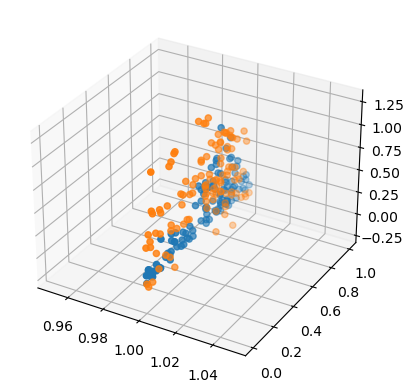

In [2108]:
predictions = Linear_model(x, theta_final)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

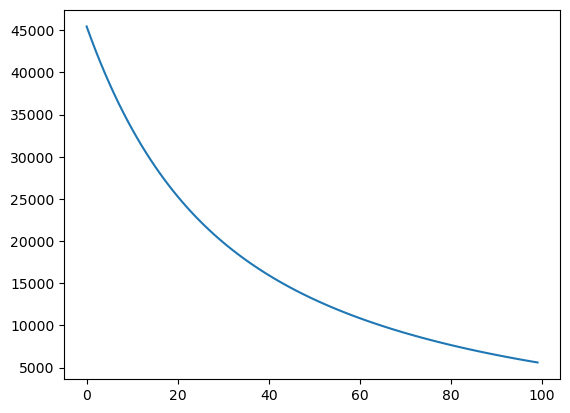

In [2109]:
plt.plot(range(n_iterations), cost_history)

In [2110]:
def coef_determination(y, pred):

    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [2111]:
coef_determination(y, predictions)

-3.6568275251044486